In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

dir(iris)


['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'iris',
 'load_iris',
 'os',
 'pd',
 'quit',
 'sys']

In [2]:
# features_names is a list of all the x
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# add all x in DF
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# add y (target) col in DF
# iris.target_name: 0: setosa, 1: versicolor, 2: virginiva
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# .count entries having 1 i,e having verisclor as species in dataset
df[df.target==1].head() 

# hence 0-50 is setoca
# 51-100 is sepecies2
# 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
# create flower col to avoid confusion 

# for each value in target col (lambda)
# it will return the name of x, iris.target_names[x]
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


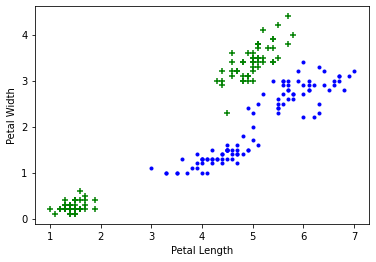

In [9]:
# Visualisation part 
# basically checking if we can visually draw a boundary
# or how easy we can see the distinction
import matplotlib.pyplot as plt
%matplotlib inline


df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

# Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],
            color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')




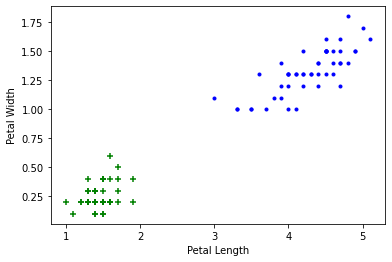

In [10]:
# Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],
            color="green", marker='+')
plt.scatter(df1['petal length (cm)'],
            df1['petal width (cm)'], color="blue", marker='.')


In [14]:
# Actual SVM training 

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# getting only feature columns in X
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creating SVM classifier
model = SVC()

# training model
model.fit(X_train, y_train) 

# finding accuracy
model.score(X_test, y_test)


0.9666666666666667